In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import numpy as np
import math as mt
import pandas as pd
import datetime

In [2]:
data = pdr.get_data_yahoo('TSLA', start='2016-01-01', end='2020-10-01')

In [3]:
data.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [4]:
def crossover_sinal(data, curto=15, longo=50):

    # Média movel simples
    data[f'SMA{curto}'] = data['Close'].rolling(curto).mean()
    data[f'SMA{longo}'] = data['Close'].rolling(longo).mean()

    # Média movel exponencial
    data[f'EMA{curto}'] = data['Close'].ewm(span=curto).mean()
    data[f'EMA{longo}'] = data['Close'].ewm(span=longo).mean()


    data['Anterior'] = data[f'SMA{curto}'].shift(1) - data[f'SMA{longo}'].shift(1)
    data['Atual'] = data[f'SMA{curto}'] - data[f'SMA{longo}']

    data.loc[(data['Anterior']<0) & (data['Atual']>0), 'Compra'] = data['Close']
    data.loc[(data['Anterior']>0) & (data['Atual']<0), 'Venda'] = data['Close']

    data.loc[(data['Compra'].isna()),'Compra'] = 0
    data.loc[0,'Compra'] = np.NaN

    data.loc[(data['Venda'].isna()),'Venda'] = 0
    data.loc[0,'Venda'] = np.NaN

    columns = ['Close', f'SMA{curto}', f'SMA{longo}', f'EMA{curto}', f'EMA{longo}', 'Compra', 'Venda']
    return data[columns].dropna()

In [5]:
output_df = crossover_sinal(data)
output_df.tail()

,Close,SMA15,SMA50,EMA15,EMA50,Compra,Venda
Date,,,,,,,
2020-09-25 00:00:00,407.339996,405.646667,366.179679,410.274058,366.510611,0.0,0.0
2020-09-28 00:00:00,421.200012,405.838668,368.600319,411.639802,368.655294,0.0,0.0
2020-09-29 00:00:00,419.070007,411.762669,370.409719,412.568578,370.632341,0.0,0.0
2020-09-30 00:00:00,429.010010,415.944670,372.716479,414.623757,372.921662,0.0,0.0
2020-10-01 00:00:00,448.160004,421.066003,375.310359,418.815787,375.872185,0.0,0.0


In [6]:
start = pd.to_datetime("2019-01-01").date()
end = pd.to_datetime("2020-12-01").date()

In [7]:
filterted_data = output_df.copy()
filterted_data.index = [pd.Timestamp(i).date() for i in filterted_data.index]
a = (filterted_data.index >= start)&(filterted_data.index < end)
filterted_data = filterted_data.loc[a]

Text(0.5, 0, 'Data')

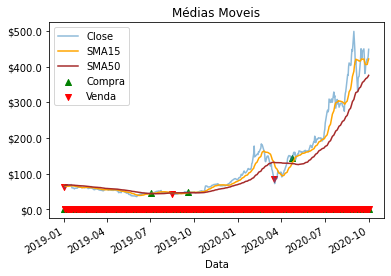

In [9]:
fig, ax = plt.subplots()
ax.plot(filterted_data.index, filterted_data['Close'], label='Close', alpha=0.5)
ax.plot(filterted_data.index, filterted_data['SMA15'], label='SMA15', color='orange')
ax.plot(filterted_data.index, filterted_data['SMA50'], label='SMA50', color='brown')

ax.scatter(filterted_data.index, filterted_data['Compra'], marker='^', label='Compra', color='green')
ax.scatter(filterted_data.index, filterted_data['Venda'], marker='v', label='Venda', color='red')

fig.autofmt_xdate()
ax.legend()

ax.yaxis.set_major_formatter('${x:}')
ax.set_title('Médias Moveis')
ax.set_xlabel('Data')


Text(0.5, 0, 'Data')

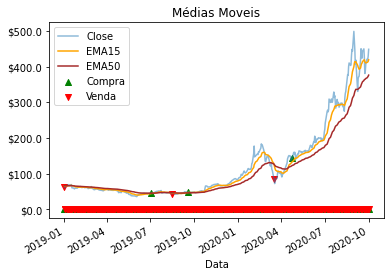

In [10]:
fig, ax = plt.subplots()
ax.plot(filterted_data.index, filterted_data['Close'], label='Close', alpha=0.5)
ax.plot(filterted_data.index, filterted_data['EMA15'], label='EMA15', color='orange')
ax.plot(filterted_data.index, filterted_data['EMA50'], label='EMA50', color='brown')

ax.scatter(filterted_data.index, filterted_data['Compra'], marker='^', label='Compra', color='green')
ax.scatter(filterted_data.index, filterted_data['Venda'], marker='v', label='Venda', color='red')

fig.autofmt_xdate()
ax.legend()

ax.yaxis.set_major_formatter('${x:}')
ax.set_title('Médias Moveis')
ax.set_xlabel('Data')

In [11]:
filterted_data.tail()

,Close,SMA15,SMA50,EMA15,EMA50,Compra,Venda
2020-09-25,407.339996,405.646667,366.179679,410.274058,366.510611,0.0,0.0
2020-09-28,421.200012,405.838668,368.600319,411.639802,368.655294,0.0,0.0
2020-09-29,419.070007,411.762669,370.409719,412.568578,370.632341,0.0,0.0
2020-09-30,429.010010,415.944670,372.716479,414.623757,372.921662,0.0,0.0
2020-10-01,448.160004,421.066003,375.310359,418.815787,375.872185,0.0,0.0


### Calcular Variação do Valor do Dia Anterior

In [12]:
filterted_data['variacao'] = filterted_data['Close'] - filterted_data['Close'].shift(1)

In [14]:
filterted_data.tail()

,Close,SMA15,SMA50,EMA15,EMA50,Compra,Venda,variacao
2020-09-25,407.339996,405.646667,366.179679,410.274058,366.510611,0.0,0.0,19.549988
2020-09-28,421.200012,405.838668,368.600319,411.639802,368.655294,0.0,0.0,13.860016
2020-09-29,419.070007,411.762669,370.409719,412.568578,370.632341,0.0,0.0,-2.130005
2020-09-30,429.010010,415.944670,372.716479,414.623757,372.921662,0.0,0.0,9.940002
2020-10-01,448.160004,421.066003,375.310359,418.815787,375.872185,0.0,0.0,19.149994


### Identificar/Separar entre periodos de ganho e perda

In [15]:
#ganho
filterted_data['ganho'] = filterted_data.loc[filterted_data['variacao']>0,'variacao'].apply(abs)
filterted_data.loc[(filterted_data['ganho'].isna()),'ganho'] = 0
filterted_data.loc[0,'ganho'] = np.NaN

#perda
filterted_data['perda'] = filterted_data.loc[filterted_data['variacao']<0,'variacao'].apply(abs)
filterted_data.loc[(filterted_data['perda'].isna()),'perda'] = 0
filterted_data.loc[0,'perda'] = np.NaN

In [16]:
filterted_data.tail()

,Close,SMA15,SMA50,EMA15,EMA50,Compra,Venda,variacao,ganho,perda
2020-09-28,421.200012,405.838668,368.600319,411.639802,368.655294,0.0,0.0,13.860016,13.860016,0.000000
2020-09-29,419.070007,411.762669,370.409719,412.568578,370.632341,0.0,0.0,-2.130005,0.000000,2.130005
2020-09-30,429.010010,415.944670,372.716479,414.623757,372.921662,0.0,0.0,9.940002,9.940002,0.000000
2020-10-01,448.160004,421.066003,375.310359,418.815787,375.872185,0.0,0.0,19.149994,19.149994,0.000000
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Calcular Média Movel (Ganhos e Perdas)

In [18]:
periodo = 14
filterted_data['avg_ganho'] = filterted_data['ganho'].rolling(periodo).mean()
filterted_data['avg_perda'] = filterted_data['perda'].rolling(periodo).mean()

In [26]:
first = filterted_data['avg_ganho'].first_valid_index()
#print(first)
for index,row in filterted_data.iterrows():
  index = pd.Timestamp(index).date()
  if index == first:
    prev_avg_ganho = row['avg_ganho']
    prev_avg_perda = row['avg_perda']
  elif index > first:
    filterted_data.loc[index,'avg_ganho'] = ((prev_avg_ganho*(periodo-1)) + row['ganho'])/periodo
    prev_avg_ganho = filterted_data.loc[index,'avg_ganho']

    filterted_data.loc[index,'avg_perda'] = ((prev_avg_perda*(periodo-1)) + row['perda'])/periodo
    prev_avg_perda = filterted_data.loc[index,'avg_perda']

In [27]:
filterted_data.tail()

,Close,SMA15,SMA50,EMA15,EMA50,Compra,Venda,variacao,ganho,perda,avg_ganho,avg_perda
2020-09-28,421.200012,405.838668,368.600319,411.639802,368.655294,0.0,0.0,13.860016,13.860016,0.000000,11.211417,9.625041
2020-09-29,419.070007,411.762669,370.409719,412.568578,370.632341,0.0,0.0,-2.130005,0.000000,2.130005,10.410601,9.089682
2020-09-30,429.010010,415.944670,372.716479,414.623757,372.921662,0.0,0.0,9.940002,9.940002,0.000000,10.376987,8.440419
2020-10-01,448.160004,421.066003,375.310359,418.815787,375.872185,0.0,0.0,19.149994,19.149994,0.000000,11.003630,7.837531
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Calcular RS e RSI

In [28]:
# Calcular RS
filterted_data[f'RS{periodo}'] = filterted_data['avg_ganho']/filterted_data['avg_perda']

In [29]:
# Calcular RSI
filterted_data[f'RSI{periodo}'] = 100 - (100/(1 + filterted_data[f'RS{periodo}']))

In [32]:
filterted_data[['RS14','RSI14']].tail()

,RS14,RSI14
2020-09-28,1.164818,53.806730
2020-09-29,1.145321,53.386925
2020-09-30,1.229440,55.145684
2020-10-01,1.403966,58.402080
0,NaN,NaN


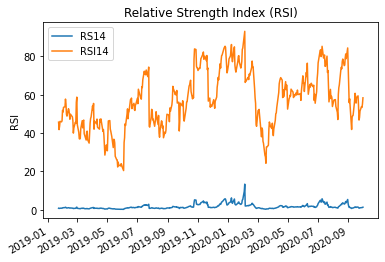

In [35]:
fig, ax = plt.subplots()

ax.plot(filterted_data.index,filterted_data['RS14'],label = 'RS14')
ax.plot(filterted_data.index,filterted_data['RSI14'],label = 'RSI14')

#formatar
ax.set_ylabel('RSI')
ax.set_title('Relative Strength Index (RSI)')
ax.legend()

fig.autofmt_xdate()